<a href="https://colab.research.google.com/github/ma7moud-3baset/Soft-Computing-Project/blob/main/K_neighbors_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import random


In [ ]:
# 2. Load and explore the dataset
df = pd.read_csv('/content/musk.csv')
X = df.drop('Class', axis=1)
y = df['Class']


In [ ]:
# 3. Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# 4. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)


In [ ]:
# 5. Define evaluation function for model performance
def print_evaluation(y_true, y_pred, title="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n--- Evaluation for {title} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Musk', 'Musk'], yticklabels=['Non-Musk', 'Musk'])
    plt.title(f'Confusion Matrix - {title}\nAccuracy: {acc:.2%}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return acc, prec, rec, f1



--- Evaluation for KNN - All Features ---
Accuracy : 0.8487
Precision: 0.7576
Recall   : 0.9615
F1-score : 0.8475

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85        67
           1       0.76      0.96      0.85        52

    accuracy                           0.85       119
   macro avg       0.86      0.86      0.85       119
weighted avg       0.87      0.85      0.85       119



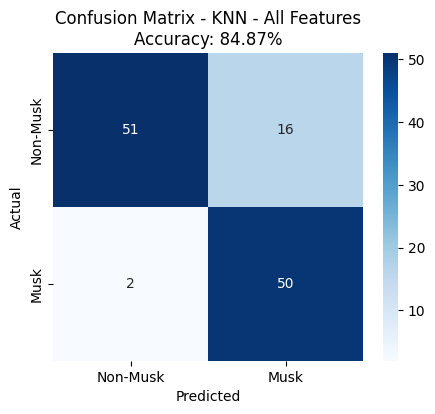

In [ ]:
# 6. Apply KNN using all features
model_all_knn = KNeighborsClassifier(n_neighbors=5)
model_all_knn.fit(X_train, y_train)
y_pred_all_knn = model_all_knn.predict(X_test)
acc_all_knn, prec_all_knn, rec_all_knn, f1_all_knn = print_evaluation(y_test, y_pred_all_knn, "KNN - All Features")


In [ ]:
# 7. Initialize Genetic Algorithm (GA) for feature selection
population_size = 20
generations = 20
mutation_rate = 0.1
n_features = X_train.shape[1]

def initialize_population():
    return [np.random.choice([0, 1], size=n_features) for _ in range(population_size)]


In [ ]:
# 8. Define GA operations: fitness, selection, crossover, and mutation
def fitness(chromosome):
    selected_features = [i for i, gene in enumerate(chromosome) if gene == 1]
    if len(selected_features) == 0:
        return 0
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train[:, selected_features], y_train)
    y_pred = model.predict(X_test[:, selected_features])
    return accuracy_score(y_test, y_pred)

def select_parents(population, fitnesses):
    sorted_population = [x for _, x in sorted(zip(fitnesses, population), key=lambda pair: pair[0], reverse=True)]
    return sorted_population[:2]

def crossover(parent1, parent2):
    point = random.randint(1, n_features - 1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

def mutate(chromosome):
    for i in range(n_features):
        if random.random() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]
    return chromosome


GA Generation 1: Best Accuracy = 0.8655
GA Generation 2: Best Accuracy = 0.8655
GA Generation 3: Best Accuracy = 0.8739
GA Generation 4: Best Accuracy = 0.8739
GA Generation 5: Best Accuracy = 0.8824
GA Generation 6: Best Accuracy = 0.8992
GA Generation 7: Best Accuracy = 0.8992
GA Generation 8: Best Accuracy = 0.9076
GA Generation 9: Best Accuracy = 0.9076
GA Generation 10: Best Accuracy = 0.8908
GA Generation 11: Best Accuracy = 0.9244
GA Generation 12: Best Accuracy = 0.8824
GA Generation 13: Best Accuracy = 0.9160
GA Generation 14: Best Accuracy = 0.8992
GA Generation 15: Best Accuracy = 0.9076
GA Generation 16: Best Accuracy = 0.8908
GA Generation 17: Best Accuracy = 0.8739
GA Generation 18: Best Accuracy = 0.8908
GA Generation 19: Best Accuracy = 0.8908
GA Generation 20: Best Accuracy = 0.8992

--- Evaluation for KNN - GA Selected Features ---
Accuracy : 0.8908
Precision: 0.8421
Recall   : 0.9231
F1-score : 0.8807

Classification Report:
               precision    recall  f1-sco

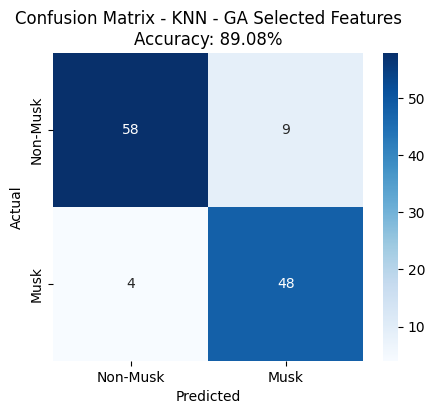

In [ ]:
# 9. Run Genetic Algorithm for feature selection
population = initialize_population()

for generation in range(generations):
    fitnesses = [fitness(chrom) for chrom in population]
    best_fit = max(fitnesses)
    print(f"GA Generation {generation+1}: Best Accuracy = {best_fit:.4f}")
    new_population = []
    for _ in range(population_size // 2):
        parents = select_parents(population, fitnesses)
        child1, child2 = crossover(parents[0], parents[1])
        new_population.extend([mutate(child1), mutate(child2)])
    population = new_population

fitnesses = [fitness(chrom) for chrom in population]
best_chromosome = population[np.argmax(fitnesses)]
selected_features_ga = [i for i, gene in enumerate(best_chromosome) if gene == 1]

model_ga_knn = KNeighborsClassifier(n_neighbors=5)
model_ga_knn.fit(X_train[:, selected_features_ga], y_train)
y_pred_ga_knn = model_ga_knn.predict(X_test[:, selected_features_ga])
acc_ga_knn, prec_ga_knn, rec_ga_knn, f1_ga_knn = print_evaluation(y_test, y_pred_ga_knn, "KNN - GA Selected Features")


PSO Iteration 1: Best Accuracy = 0.8655
PSO Iteration 2: Best Accuracy = 0.8655
PSO Iteration 3: Best Accuracy = 0.8739
PSO Iteration 4: Best Accuracy = 0.8739
PSO Iteration 5: Best Accuracy = 0.8739
PSO Iteration 6: Best Accuracy = 0.8739
PSO Iteration 7: Best Accuracy = 0.8739
PSO Iteration 8: Best Accuracy = 0.8739
PSO Iteration 9: Best Accuracy = 0.8739
PSO Iteration 10: Best Accuracy = 0.8739
PSO Iteration 11: Best Accuracy = 0.8739
PSO Iteration 12: Best Accuracy = 0.8739
PSO Iteration 13: Best Accuracy = 0.8739
PSO Iteration 14: Best Accuracy = 0.8824
PSO Iteration 15: Best Accuracy = 0.8824
PSO Iteration 16: Best Accuracy = 0.8824
PSO Iteration 17: Best Accuracy = 0.8824
PSO Iteration 18: Best Accuracy = 0.8824
PSO Iteration 19: Best Accuracy = 0.8908
PSO Iteration 20: Best Accuracy = 0.8908

--- Evaluation for KNN - PSO Selected Features ---
Accuracy : 0.8908
Precision: 0.8095
Recall   : 0.9808
F1-score : 0.8870

Classification Report:
               precision    recall  f1-sc

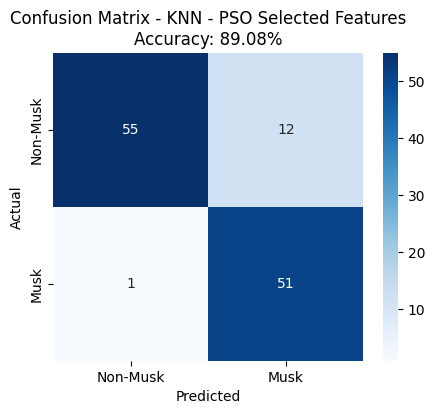

In [ ]:
# 10. Apply Particle Swarm Optimization (PSO) for feature selection
n_particles = 20
iterations = 20
w = 0.5
c1 = 1.5
c2 = 1.5

particles = np.random.rand(n_particles, n_features)
velocities = np.random.rand(n_particles, n_features)
personal_best_positions = particles.copy()
personal_best_scores = np.zeros(n_particles)

for i in range(n_particles):
    selected = particles[i] > 0.5
    if np.sum(selected) == 0:
        personal_best_scores[i] = 0
    else:
        model = KNeighborsClassifier(n_neighbors=5)
        model.fit(X_train[:, selected], y_train)
        y_pred = model.predict(X_test[:, selected])
        personal_best_scores[i] = accuracy_score(y_test, y_pred)

global_best_idx = np.argmax(personal_best_scores)
global_best_position = personal_best_positions[global_best_idx].copy()

for iteration in range(iterations):
    for i in range(n_particles):
        r1 = np.random.rand(n_features)
        r2 = np.random.rand(n_features)
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best_positions[i] - particles[i])
            + c2 * r2 * (global_best_position - particles[i])
        )
        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], 0, 1)
        selected = particles[i] > 0.5
        if np.sum(selected) == 0:
            score = 0
        else:
            model = KNeighborsClassifier(n_neighbors=5)
            model.fit(X_train[:, selected], y_train)
            y_pred = model.predict(X_test[:, selected])
            score = accuracy_score(y_test, y_pred)
        if score > personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = particles[i].copy()
    global_best_idx = np.argmax(personal_best_scores)
    global_best_position = personal_best_positions[global_best_idx].copy()
    print(f"PSO Iteration {iteration+1}: Best Accuracy = {personal_best_scores[global_best_idx]:.4f}")

best_features_mask = global_best_position > 0.5
selected_features_pso = [i for i, selected in enumerate(best_features_mask) if selected]

model_pso_knn = KNeighborsClassifier(n_neighbors=5)
model_pso_knn.fit(X_train[:, selected_features_pso], y_train)
y_pred_pso_knn = model_pso_knn.predict(X_test[:, selected_features_pso])
acc_pso_knn, prec_pso_knn, rec_pso_knn, f1_pso_knn = print_evaluation(y_test, y_pred_pso_knn, "KNN - PSO Selected Features")


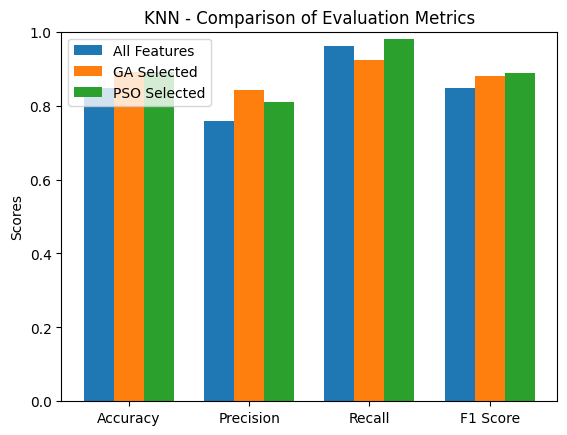

In [ ]:
# 11. Compare the three models based on performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
all_scores = [acc_all_knn, prec_all_knn, rec_all_knn, f1_all_knn]
ga_scores = [acc_ga_knn, prec_ga_knn, rec_ga_knn, f1_ga_knn]
pso_scores = [acc_pso_knn, prec_pso_knn, rec_pso_knn, f1_pso_knn]

x = np.arange(len(metrics))
width = 0.25

plt.bar(x - width, all_scores, width, label='All Features')
plt.bar(x, ga_scores, width, label='GA Selected')
plt.bar(x + width, pso_scores, width, label='PSO Selected')

plt.ylabel('Scores')
plt.title('KNN - Comparison of Evaluation Metrics')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.show()



--- Evaluation for KNN - All Features ---
Accuracy : 0.8487
Precision: 0.7576
Recall   : 0.9615
F1-score : 0.8475

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85        67
           1       0.76      0.96      0.85        52

    accuracy                           0.85       119
   macro avg       0.86      0.86      0.85       119
weighted avg       0.87      0.85      0.85       119



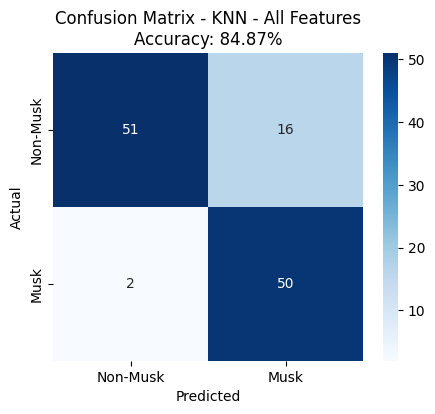

GA Generation 1: Best Accuracy = 0.8655
GA Generation 2: Best Accuracy = 0.8739
GA Generation 3: Best Accuracy = 0.8824
GA Generation 4: Best Accuracy = 0.8908
GA Generation 5: Best Accuracy = 0.8739
GA Generation 6: Best Accuracy = 0.8992
GA Generation 7: Best Accuracy = 0.9160
GA Generation 8: Best Accuracy = 0.8992
GA Generation 9: Best Accuracy = 0.8908
GA Generation 10: Best Accuracy = 0.9076
GA Generation 11: Best Accuracy = 0.9244
GA Generation 12: Best Accuracy = 0.9244
GA Generation 13: Best Accuracy = 0.9244
GA Generation 14: Best Accuracy = 0.9076
GA Generation 15: Best Accuracy = 0.8992
GA Generation 16: Best Accuracy = 0.9160
GA Generation 17: Best Accuracy = 0.9328
GA Generation 18: Best Accuracy = 0.9412
GA Generation 19: Best Accuracy = 0.9076
GA Generation 20: Best Accuracy = 0.9244

--- Evaluation for KNN - GA Selected Features ---
Accuracy : 0.9244
Precision: 0.8909
Recall   : 0.9423
F1-score : 0.9159

Classification Report:
               precision    recall  f1-sco

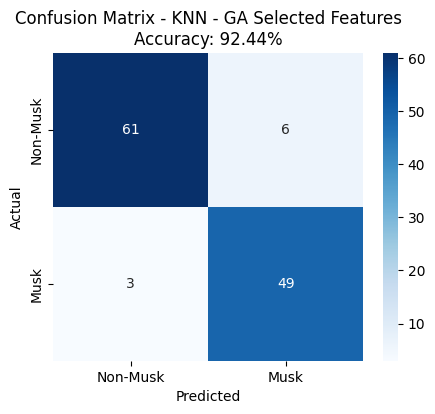

PSO Iteration 1: Best Accuracy = 0.8739
PSO Iteration 2: Best Accuracy = 0.8739
PSO Iteration 3: Best Accuracy = 0.8739
PSO Iteration 4: Best Accuracy = 0.8739
PSO Iteration 5: Best Accuracy = 0.8908
PSO Iteration 6: Best Accuracy = 0.8908
PSO Iteration 7: Best Accuracy = 0.8992
PSO Iteration 8: Best Accuracy = 0.9076
PSO Iteration 9: Best Accuracy = 0.9076
PSO Iteration 10: Best Accuracy = 0.9076
PSO Iteration 11: Best Accuracy = 0.9076
PSO Iteration 12: Best Accuracy = 0.9076
PSO Iteration 13: Best Accuracy = 0.9160
PSO Iteration 14: Best Accuracy = 0.9160
PSO Iteration 15: Best Accuracy = 0.9160
PSO Iteration 16: Best Accuracy = 0.9160
PSO Iteration 17: Best Accuracy = 0.9160
PSO Iteration 18: Best Accuracy = 0.9244
PSO Iteration 19: Best Accuracy = 0.9244
PSO Iteration 20: Best Accuracy = 0.9244

--- Evaluation for KNN - PSO Selected Features ---
Accuracy : 0.9244
Precision: 0.8525
Recall   : 1.0000
F1-score : 0.9204

Classification Report:
               precision    recall  f1-sc

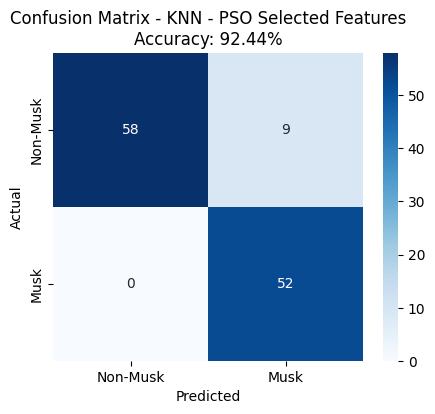

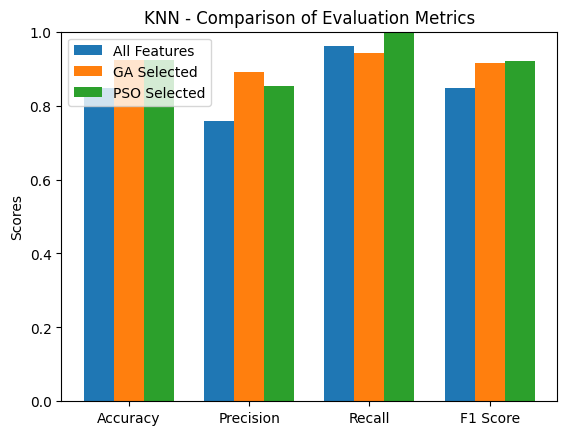

In [ ]:
# --- استيراد المكتبات الضرورية ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import random

# --- تحميل البيانات ---
df = pd.read_csv('/content/musk.csv')
X = df.drop('Class', axis=1)
y = df['Class']

# --- معالجة البيانات ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# --- دالة تقييم النموذج ---
def print_evaluation(y_true, y_pred, title="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n--- Evaluation for {title} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Musk', 'Musk'], yticklabels=['Non-Musk', 'Musk'])
    plt.title(f'Confusion Matrix - {title}\nAccuracy: {acc:.2%}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return acc, prec, rec, f1

# --- KNN على كل الخصائص ---
model_all_knn = KNeighborsClassifier(n_neighbors=5)
model_all_knn.fit(X_train, y_train)
y_pred_all_knn = model_all_knn.predict(X_test)
acc_all_knn, prec_all_knn, rec_all_knn, f1_all_knn = print_evaluation(y_test, y_pred_all_knn, "KNN - All Features")

# --- Genetic Algorithm (GA) لـ KNN ---
population_size = 20
generations = 20
mutation_rate = 0.1
n_features = X_train.shape[1]

def initialize_population():
    return [np.random.choice([0, 1], size=n_features) for _ in range(population_size)]

def fitness(chromosome):
    selected_features = [i for i, gene in enumerate(chromosome) if gene == 1]
    if len(selected_features) == 0:
        return 0
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train[:, selected_features], y_train)
    y_pred = model.predict(X_test[:, selected_features])
    return accuracy_score(y_test, y_pred)

def select_parents(population, fitnesses):
    sorted_population = [x for _, x in sorted(zip(fitnesses, population), key=lambda pair: pair[0], reverse=True)]
    return sorted_population[:2]

def crossover(parent1, parent2):
    point = random.randint(1, n_features - 1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

def mutate(chromosome):
    for i in range(n_features):
        if random.random() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

population = initialize_population()

for generation in range(generations):
    fitnesses = [fitness(chrom) for chrom in population]
    best_fit = max(fitnesses)
    print(f"GA Generation {generation+1}: Best Accuracy = {best_fit:.4f}")
    new_population = []
    for _ in range(population_size // 2):
        parents = select_parents(population, fitnesses)
        child1, child2 = crossover(parents[0], parents[1])
        new_population.extend([mutate(child1), mutate(child2)])
    population = new_population

fitnesses = [fitness(chrom) for chrom in population]
best_chromosome = population[np.argmax(fitnesses)]
selected_features_ga = [i for i, gene in enumerate(best_chromosome) if gene == 1]

model_ga_knn = KNeighborsClassifier(n_neighbors=5)
model_ga_knn.fit(X_train[:, selected_features_ga], y_train)
y_pred_ga_knn = model_ga_knn.predict(X_test[:, selected_features_ga])
acc_ga_knn, prec_ga_knn, rec_ga_knn, f1_ga_knn = print_evaluation(y_test, y_pred_ga_knn, "KNN - GA Selected Features")

# --- PSO لـ KNN ---
n_particles = 20
iterations = 20
w = 0.5
c1 = 1.5
c2 = 1.5

particles = np.random.rand(n_particles, n_features)
velocities = np.random.rand(n_particles, n_features)
personal_best_positions = particles.copy()
personal_best_scores = np.zeros(n_particles)

for i in range(n_particles):
    selected = particles[i] > 0.5
    if np.sum(selected) == 0:
        personal_best_scores[i] = 0
    else:
        model = KNeighborsClassifier(n_neighbors=5)
        model.fit(X_train[:, selected], y_train)
        y_pred = model.predict(X_test[:, selected])
        personal_best_scores[i] = accuracy_score(y_test, y_pred)

global_best_idx = np.argmax(personal_best_scores)
global_best_position = personal_best_positions[global_best_idx].copy()

for iteration in range(iterations):
    for i in range(n_particles):
        r1 = np.random.rand(n_features)
        r2 = np.random.rand(n_features)
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best_positions[i] - particles[i])
            + c2 * r2 * (global_best_position - particles[i])
        )
        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], 0, 1)
        selected = particles[i] > 0.5
        if np.sum(selected) == 0:
            score = 0
        else:
            model = KNeighborsClassifier(n_neighbors=5)
            model.fit(X_train[:, selected], y_train)
            y_pred = model.predict(X_test[:, selected])
            score = accuracy_score(y_test, y_pred)
        if score > personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = particles[i].copy()
    global_best_idx = np.argmax(personal_best_scores)
    global_best_position = personal_best_positions[global_best_idx].copy()
    print(f"PSO Iteration {iteration+1}: Best Accuracy = {personal_best_scores[global_best_idx]:.4f}")

best_features_mask = global_best_position > 0.5
selected_features_pso = [i for i, selected in enumerate(best_features_mask) if selected]

model_pso_knn = KNeighborsClassifier(n_neighbors=5)
model_pso_knn.fit(X_train[:, selected_features_pso], y_train)
y_pred_pso_knn = model_pso_knn.predict(X_test[:, selected_features_pso])
acc_pso_knn, prec_pso_knn, rec_pso_knn, f1_pso_knn = print_evaluation(y_test, y_pred_pso_knn, "KNN - PSO Selected Features")

# --- مقارنة النماذج ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
all_scores = [acc_all_knn, prec_all_knn, rec_all_knn, f1_all_knn]
ga_scores = [acc_ga_knn, prec_ga_knn, rec_ga_knn, f1_ga_knn]
pso_scores = [acc_pso_knn, prec_pso_knn, rec_pso_knn, f1_pso_knn]

x = np.arange(len(metrics))
width = 0.25

plt.bar(x - width, all_scores, width, label='All Features')
plt.bar(x, ga_scores, width, label='GA Selected')
plt.bar(x + width, pso_scores, width, label='PSO Selected')

plt.ylabel('Scores')
plt.title('KNN - Comparison of Evaluation Metrics')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.show()
